In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capstone-car-accident-serveity/Data_Collisions.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objs as go

In [3]:
df = pd.read_csv("../input/capstone-car-accident-serveity/Data_Collisions.csv")
pd.set_option('display.max_columns',100)

In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
col = ["STATUS","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE",
       "UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"]

for x in col:
    df[col]=df[col].astype('category')

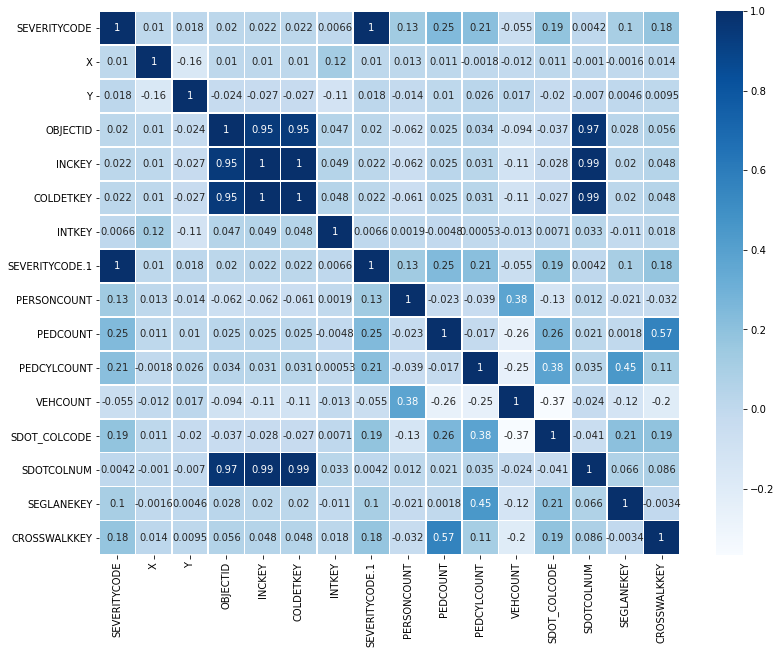

In [7]:
corr = df.corr()
plt.figure(figsize=(13,10))
ax = sns.heatmap(corr,annot=True,cmap='Blues',linewidths=0.5)

In [ ]:
df.dtypes

In [8]:
df['date_time'] = pd.to_datetime(df['INCDTTM'])
df['date'] = df['date_time'].dt.date
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week_day'] = df['date_time'].dt.weekday
df['hour'] = df['date_time'].dt.hour

In [9]:
df.drop(['INCDATE','INCDTTM','INCKEY','COLDETKEY','SEVERITYCODE.1'],axis=1,inplace=True)

In [10]:
df['SEVERITYDESC'] = df['SEVERITYDESC'].astype('category')

In [11]:
df.drop(['OBJECTID','REPORTNO','INTKEY','EXCEPTRSNCODE','SDOT_COLCODE','INATTENTIONIND',
'SDOTCOLNUM','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','LOCATION','EXCEPTRSNDESC','SDOT_COLDESC','INATTENTIONIND',
'PEDROWNOTGRNT','ST_COLDESC'],axis=1, inplace=True)

In [12]:
df.drop(['X','Y'],axis=1,inplace=True)

In [13]:
df['UNDERINFL'].value_counts(normalize=True)*100

N    52.834464
0    42.359673
Y     2.700894
1     2.104969
Name: UNDERINFL, dtype: float64

In [14]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

In [15]:
df['UNDERINFL'].value_counts(normalize=True)*100

N    95.194137
Y     4.805863
Name: UNDERINFL, dtype: float64

In [ ]:
df.dtypes

In [16]:
def barplot1(column,data):
    barplot2 = sns.countplot(x=column, data=df)
    total=len(df[column])
    for p in barplot2.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        barplot2.text(p.get_x() + p.get_width()/2,height+5,percentage, ha='center')

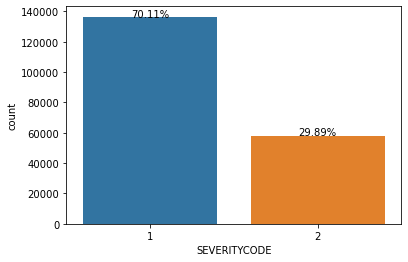

In [17]:
barplot1('SEVERITYCODE',df)

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['COLLISIONTYPE'])

In [ ]:
barplot1('ADDRTYPE',df)

In [ ]:
df['UNDERINFL'] = df['UNDERINFL'].astype('category')

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["year"],ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df['month'],ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.Text(fontsize=20)
sns.countplot(x=df['WEATHER'], ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=df['ROADCOND'],ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['year'],hue=df['SEVERITYCODE'],ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df['year'],hue=df['SEVERITYCODE'],ax=ax)

In [ ]:
temp = df.groupby(['SEVERITYCODE','ADDRTYPE']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['SEVERITYCODE','ADDRTYPE','Count']

In [ ]:
trace1 = go.Bar(x=temp.SEVERITYCODE[temp.ADDRTYPE=='Alley'], 
               y=temp.Count[temp.ADDRTYPE=='Alley']/temp.Count.sum(), name='Alley')
trace2 = go.Bar(x=temp.SEVERITYCODE[temp.ADDRTYPE=='Block'],
               y=temp.Count[temp.ADDRTYPE=='Block']/temp.Count.sum(), name='Block')
trace3 = go.Bar(x=temp.SEVERITYCODE[temp.ADDRTYPE=='Intersection'],
               y=temp.Count[temp.ADDRTYPE=='Intersection']/temp.Count.sum(), name='Intersection')
data = [trace1, trace2, trace3]
layout = go.Layout(width=700,height=400,title='SEVERITYCODE VS ADDRTYPE')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
temp1 = df.groupby(['SEVERITYCODE','UNDERINFL']).size().to_frame()
temp1 = temp1.reset_index()
temp1.columns=['SEVERITYCODE','UNDERINF','Count']

In [ ]:
trace4 = go.Bar(x=temp1.SEVERITYCODE[temp1.UNDERINF=='Y'],
               y=temp1.Count[temp1.UNDERINF=='Y']/temp1.Count.sum(), name='Under Influence')
trace5 = go.Bar(x=temp1.SEVERITYCODE[temp1.UNDERINF=='N'],
               y=temp1.Count[temp1.UNDERINF=='N']/temp1.Count.sum(), name='Not Under Influence')
data1 = [trace4, trace5]
layout1 = go.Layout(width=600,height=400,title='Under Influence or NOT')
fig1 = go.Figure(data=data1, layout=layout1)
fig1.show()

In [ ]:
temp2 = df.groupby(['SEVERITYCODE','COLLISIONTYPE']).size().to_frame()
temp2 = temp2.reset_index()
temp2.columns=['SEVERITYCODE','COLLISIONTYPE','Count']

In [ ]:
trace6 = go.Bar(x=temp2.COLLISIONTYPE[temp2.SEVERITYCODE==1],
               y=temp2.Count[temp2.SEVERITYCODE==1]/temp2.Count.sum(), name='property Damage Collision')
trace7 = go.Bar(x=temp2.COLLISIONTYPE[temp2.SEVERITYCODE==2],
               y=temp2.Count[temp2.SEVERITYCODE==2]/temp2.Count.sum(), name='Injure Collision')



data2 = [trace6, trace7]
layout2 = go.Layout(width = 800,
                     height = 500,title='Damage Type')
fig2 = go.Figure(data=data2, layout=layout2)
fig2.show()

In [ ]:
temp3 = df.groupby(['SEVERITYCODE','LIGHTCOND']).size().to_frame()
temp3 = temp3.reset_index()
temp3.columns=['SEVERITYCODE','LIGHTCOND','Count']

In [ ]:
trace16 = go.Bar(x=temp3.LIGHTCOND[temp3.SEVERITYCODE==1],
               y=temp3.Count[temp3.SEVERITYCODE==1]/temp3.Count.sum(), name='Property Damage Collision')
trace17 = go.Bar(x=temp3.LIGHTCOND[temp3.SEVERITYCODE==2],
               y=temp3.Count[temp3.SEVERITYCODE==2]/temp3.Count.sum(), name='Injure Collision')





data3 = [trace16, trace17]
layout3 = go.Layout(width = 800,
                     height = 500,title='Light Condition')
fig3 = go.Figure(data=data3, layout=layout3)
fig3.show()

In [18]:
bins = 0, 4, 8, 12, 16, 20, 24
group_names = ['LateNight','EarlyMrng','Morning','Noon','Evening','Night']
df['TimeOfDay'] = pd.cut(df['hour'],bins,labels=group_names)

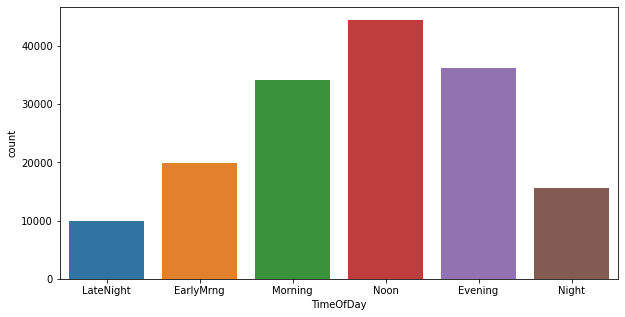

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['TimeOfDay'], ax=ax)

In [20]:
temp4 = df.groupby(['SEVERITYCODE','TimeOfDay']).size().to_frame()
temp4 = temp4.reset_index()
temp4.columns=['SEVERITYCODE','TimeOfDay','Count']

In [ ]:
trace30 = go.Bar(x=temp4.TimeOfDay[temp4.SEVERITYCODE==1],
               y=temp4.Count[temp4.SEVERITYCODE==1]/temp4.Count.sum(), name='Property Damage Collision')

trace31 = go.Bar(x=temp4.TimeOfDay[temp4.SEVERITYCODE==2],
               y=temp4.Count[temp4.SEVERITYCODE==2]/temp4.Count.sum(), name='Injure Collision')


data5 = [trace30,trace31]
layout5 = go.Layout(width = 800,
                     height = 500,title='Time Of Day')
fig5 = go.Figure(data=data5, layout=layout5)
fig5.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['week_day'],ax=ax)

In [ ]:
temp5 = df.groupby(['week_day','TimeOfDay']).size().to_frame()
temp5 = temp5.reset_index()
temp5.columns=['week_day','TimeOfDay','Count']

In [ ]:
trace32 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==0],
               y=temp5.Count[temp5.week_day==0]/temp5.Count.sum(), name='Monday')

trace33 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==1],
               y=temp5.Count[temp5.week_day==1]/temp5.Count.sum(), name='Tuesday')

trace34 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==2],
               y=temp5.Count[temp5.week_day==2]/temp5.Count.sum(), name='Wednesday')

trace35 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==3],
               y=temp5.Count[temp5.week_day==3]/temp5.Count.sum(), name='Thursday')

trace36 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==4],
               y=temp5.Count[temp5.week_day==4]/temp5.Count.sum(), name='friday')

trace37 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==5],
               y=temp5.Count[temp5.week_day==5]/temp5.Count.sum(), name='Saturday')

trace38 = go.Bar(x=temp5.TimeOfDay[temp5.week_day==6],
               y=temp5.Count[temp5.week_day==6]/temp5.Count.sum(), name='Sunday')



data6 = [trace32,trace33,trace34,trace35,trace36,trace37,trace38]
layout6 = go.Layout(width = 800,
                     height = 400,title='Week')
fig6 = go.Figure(data=data6, layout=layout6)
fig6.show()

In [ ]:
df.head(2)

In [ ]:
temp9 = df.groupby(['TimeOfDay','SPEEDING']).size().to_frame()
temp9 = temp9.reset_index()
temp9.columns = ['TimeOfDay','SPEEDING','Count']
temp9

In [ ]:
trace38 = go.Bar(x=temp9.TimeOfDay[temp9.SPEEDING=='Y'],
               y=temp9.Count[temp9.SPEEDING=='Y']/temp5.Count.sum(), name='SPEEDING')
data9 = [trace38]
layout9 = go.Layout(width=800, height=400,title='Speeding Analysis')
fig = go.Figure(data=data9, layout=layout9)
fig.show()

In [ ]:
temp10 = df.groupby(['WEATHER','SEVERITYCODE']).size().to_frame()
temp10 = temp10.reset_index()
temp10.columns = ['WEATHER','SEVERITYCODE','Count']
temp10

In [ ]:
trace40 = go.Bar(x=temp10.WEATHER[temp10.SEVERITYCODE==1],
                 y=temp10.Count[temp10.SEVERITYCODE==1]/temp10.Count.sum(), name='Property Damage Collision')
trace41 = go.Bar(x=temp10.WEATHER[temp10.SEVERITYCODE==2],
                y=temp10.Count[temp10.SEVERITYCODE==2]/temp10.Count.sum(), name='Injure Collision')

data10 = [trace40,trace41]
layout10 = go.Layout(width=800, height=500, title="Weathet Impact")
fig10 = go.Figure(data=data10,layout=layout10)
fig10.show()

In [ ]:
trace42 = go.Box(y = df.PERSONCOUNT[df.HITPARKEDCAR=='Y'], name='Hitting Parked Car')
trace43 = go.Box(y=df.PERSONCOUNT[df.HITPARKEDCAR=='N'], name='Not Hitting parked Car')

data11 = [trace42,trace43]
layout11 = go.Layout(width=800,height=600,title='impact of hitting')
fig11 = go.Figure(data=data11, layout=layout11)
fig11.show()

In [21]:
df['SEVERITYCODE']=df['SEVERITYCODE'].astype('category')

In [22]:
df.drop(['date_time', 'SEVERITYDESC','SPEEDING','STATUS'],axis=1,inplace=True)

In [23]:
df.drop('TimeOfDay',axis=1,inplace=True)

In [24]:
df.drop('date',axis=1,inplace=True)

In [ ]:
df.dtypes

In [25]:
df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

# # # # # # 0 Property Damage Only Collision    
# # # # # # 1  Injury Collision

In [26]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace(to_replace=[1,2], value=[0,1])
df['SEVERITYCODE'].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [28]:
y = df['SEVERITYCODE']
X = df.drop('SEVERITYCODE',axis=1)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=190)

In [29]:
print(X_train.shape)
print(X_val.shape)

(136271, 16)
(58402, 16)


In [30]:
X_train.isnull().sum()

ADDRTYPE         1336
COLLISIONTYPE    3453
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     4455
UNDERINFL        3439
WEATHER          3573
ROADCOND         3529
LIGHTCOND        3635
HITPARKEDCAR        0
year                0
month               0
week_day            0
hour                0
dtype: int64

In [31]:
num_attr = X_train.select_dtypes(['int64','float64']).columns
cat_attr = X_train.select_dtypes('category').columns

In [32]:
X_train[num_attr].isnull().sum()

PERSONCOUNT    0
PEDCOUNT       0
PEDCYLCOUNT    0
VEHCOUNT       0
year           0
month          0
week_day       0
hour           0
dtype: int64

In [33]:
X_train[cat_attr].isnull().sum()

ADDRTYPE         1336
COLLISIONTYPE    3453
JUNCTIONTYPE     4455
WEATHER          3573
ROADCOND         3529
LIGHTCOND        3635
HITPARKEDCAR        0
dtype: int64

In [34]:
standard = StandardScaler()
standard.fit(X_train[num_attr])
X_train_std = standard.transform(X_train[num_attr])
X_val_std = standard.transform(X_val[num_attr])

X_train_num = pd.DataFrame(X_train_std, columns=num_attr)
X_val_num = pd.DataFrame(X_val_std, columns=num_attr)

In [35]:
impute = SimpleImputer(strategy='most_frequent')
impute.fit(X_train[cat_attr])
X_train[cat_attr] = impute.transform(X_train[cat_attr])
X_val[cat_attr] = impute.transform(X_val[cat_attr])

In [36]:
ohe = OneHotEncoder()

ohe.fit(X_train[cat_attr])
ohe_col = list(ohe.get_feature_names(cat_attr))
X_train_ohe = ohe.transform(X_train[cat_attr])
X_val_ohe = ohe.transform(X_val[cat_attr])

X_train_cat = pd.DataFrame(X_train_ohe.todense(), columns=ohe_col)
X_val_cat = pd.DataFrame(X_val_ohe.todense(), columns=ohe_col)

In [37]:
X_train = pd.concat([X_train_num, X_train_cat],axis=1)
X_val = pd.concat([X_val_num, X_val_cat],axis=1)
print(X_train.shape)
print(X_val.shape)

(136271, 59)
(58402, 59)


In [ ]:
X_train.head(2)

In [38]:
scores = pd.DataFrame(columns=['Model','Train_accuracy','Train_recall','Train_precision','Train_F1score',
                              'Test_accuracy', 'Test_recall','Test_precision','Test_F1score'])
def getmetrics(train_actual, train_predicted, test_actual, test_predicted, model_selection, dataframe):
    train_accuracy=accuracy_score(train_actual,train_predicted)
    train_recall=recall_score(train_actual,train_predicted, average='weighted')
    train_precision=precision_score(train_actual,train_predicted,average='weighted')
    train_f1score=f1_score(train_actual,train_predicted, average='weighted')
    test_accuracy=accuracy_score(test_actual,test_predicted)
    test_recall=recall_score(test_actual,test_predicted, average='weighted')
    test_precision=precision_score(test_actual,test_predicted,average='weighted')
    test_f1score=f1_score(test_actual,test_predicted, average='weighted')
    dataframe=dataframe.append(pd.Series([model_selection,train_accuracy,train_recall,train_precision,
                                          train_f1score,test_accuracy,test_recall,test_precision,test_f1score],
                                         index=scores.columns),ignore_index=True)
    return(dataframe)


In [39]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_train_pred = logistic.predict(X_train)
logistic_val_pred = logistic.predict(X_val)
logistic_acc = accuracy_score(logistic_val_pred,y_val)
logistic_acc

0.7543748501763639

In [40]:
scores = getmetrics(y_train,logistic_train_pred,y_val,logistic_val_pred,"Logistic regression",scores)
scores

,Model,Train_accuracy,Train_recall,Train_precision,Train_F1score,Test_accuracy,Test_recall,Test_precision,Test_F1score
0,Logistic regression,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947


In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_pred = logistic.predict(X_train)
knn_val_pred = logistic.predict(X_val)
knn_acc = accuracy_score(logistic_val_pred,y_val)
knn_acc

0.7543748501763639

In [42]:
scores = getmetrics(y_train,knn_train_pred,y_val,knn_val_pred,"KNN",scores)
scores

,Model,Train_accuracy,Train_recall,Train_precision,Train_F1score,Test_accuracy,Test_recall,Test_precision,Test_F1score
0,Logistic regression,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947
1,KNN,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947


In [43]:
dt = DecisionTreeClassifier(max_depth=200)
dt.fit(X_train, y_train)
dt_train_pred = logistic.predict(X_train)
dt_val_pred = logistic.predict(X_val)
dt_acc = accuracy_score(logistic_val_pred,y_val)
dt_acc

0.7543748501763639

In [44]:
scores = getmetrics(y_train,dt_train_pred,y_val,dt_val_pred,"Decision Tree",scores)
scores

,Model,Train_accuracy,Train_recall,Train_precision,Train_F1score,Test_accuracy,Test_recall,Test_precision,Test_F1score
0,Logistic regression,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947
1,KNN,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947
2,Decision Tree,0.755509,0.755509,0.753268,0.71415,0.754375,0.754375,0.750332,0.712947


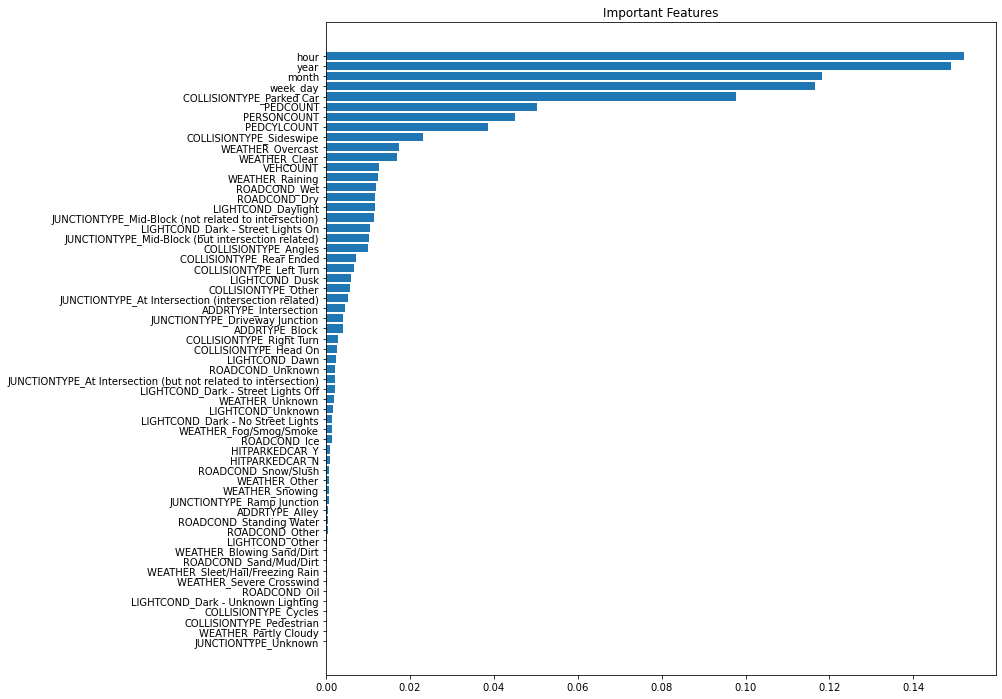

In [45]:
importances = dt.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

plt.figure(figsize=(12,12))
plt.title('Important Features')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)),[features[i] for i in indices], fontsize=10)
plt.show()

In [ ]:
clf2 = DecisionTreeClassifier()


param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth' :[300,400,500],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[1,2,3]
    
}
dt1 = GridSearchCV(clf2, param_grid,cv=10)
dt1.fit(X_train, y_train)
dt1_train_pred = logistic.predict(X_train)
dt1_val_pred = logistic.predict(X_val)

In [ ]:
dt1.best_params_

In [ ]:
dt1_acc = accuracy_score(logistic_val_pred,y_val)
dt1_acc

In [ ]:
scores = getmetrics(y_train,dt1_train_pred,y_val,dt1_val_pred,"GridSearch DecisionTree2",scores)
scores

In [ ]:
rf = RandomForestClassifier(max_depth=1000)
rf.fit(X_train, y_train)
rf_train_pred = logistic.predict(X_train)
rf_val_pred = logistic.predict(X_val)
rf_acc = accuracy_score(logistic_val_pred,y_val)
rf_acc

In [ ]:
scores = getmetrics(y_train,rf_train_pred,y_val,rf_val_pred,"Random Forest",scores)
scores

In [ ]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_train_pred = logistic.predict(X_train)
ada_val_pred = logistic.predict(X_val)
ada_acc = accuracy_score(logistic_val_pred,y_val)
ada_acc


In [ ]:
scores = getmetrics(y_train,ada_train_pred,y_val,ada_val_pred,"Ada Boosting",scores)
scores

In [ ]:
dt3 = DecisionTreeClassifier(class_weight='balanced',max_depth=100)
dt3.fit(X_train, y_train)
dt3_train_pred = logistic.predict(X_train)
dt3_val_pred = logistic.predict(X_val)
dt3_acc = accuracy_score(logistic_val_pred,y_val)
dt3_acc

In [ ]:
scores = getmetrics(y_train,dt3_train_pred,y_val,dt3_val_pred,"DT Class Imbalnce",scores)
scores

In [46]:

param_grid = {'n_estimators' : [700, 800, 1000],
              'learning_rate' : [0.01, 0.05, 0.1]}

clf_grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), param_grid,n_jobs=-1)

In [47]:
clf_grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [700, 800, 1000]})

In [48]:
best_ada_model = clf_grid_ada.best_estimator_
y_pred_train = best_ada_model.predict(X_train)
y_pred_val = best_ada_model.predict(X_val)

In [49]:
ada_acc = accuracy_score(y_pred_val,y_val)
ada_acc

0.7158145268997637

In [50]:
clf_grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [ ]:
clf_grid_ada.best_params_

In [ ]:
scores = (y_train,dt_train_pred,y_val,dt_val_pred,"Decision Tree",scores)
scores

In [1]:
scores = getmetrics(y_train,y_pred_train,y_val,y_pred_val,"Adaboost_BestParameters",scores)
scores

NameError: name 'getmetrics' is not defined

In [ ]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_train_pred = logistic.predict(X_train)
xg_val_pred = logistic.predict(X_val)
xg_acc = accuracy_score(logistic_val_pred,y_val)
xg_acc

In [ ]:
scores = getmetrics(y_train,xg_train_pred,y_val,xg_val_pred,"Gradient Boosting",scores)
scores

In [ ]:
clf_XGB_grid = XGBClassifier()

param_grid1 = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100, 200],
     'max_depth': [3, 4],
     'gamma': [0.2,0.3,0.4],
     'learning_rate': [0.001, 0.01, 0.1, 1, 10]
}

CV_XGB = GridSearchCV(estimator=clf_XGB_grid,param_grid=param_grid1, n_jobs=-1)
%time CV_XGB.fit(X = X_train, y=y_train)


xg_param_pred_train=CV_XGB.predict(X_train)
xg_param_pred_val=CV_XGB.predict(X_val)

In [ ]:
scores = getmetrics(y_train,xg_param_pred_train,y_val,xg_param_pred_val,"XGBoost_BestParameters",scores)
scores